Formula from Eleni's master thesis with the condition for ignoring eccentricity of the orbit (from $T_{fus}<T_{orb}$ -> fusion time less than orbit time).

$1-e_0^2 \leq 5.5\times 10^{-6}\left(\frac{a_0}{1AU}\right)^{-5/7}\left(\frac{M}{M_{\odot}}\right)^{5/7}$

$e_0 \geq \sqrt{1-5.5\times 10^{-6}\left(\frac{a_0}{1AU}\right)^{-5/7}\left(\frac{M}{M_{\odot}}\right)^{5/7}}$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

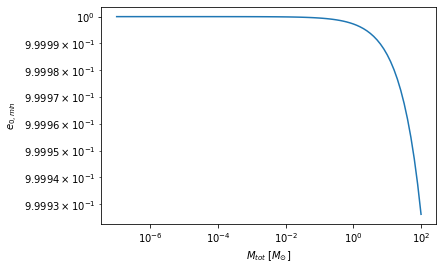

<ipython-input-42-cca3ed4bf327>:7: RuntimeWarning: invalid value encountered in sqrt
  e0 = np.sqrt(1 - 5.5e-6*(np.power(a0,-5./7))*(np.power(M_tot, 5./7)))


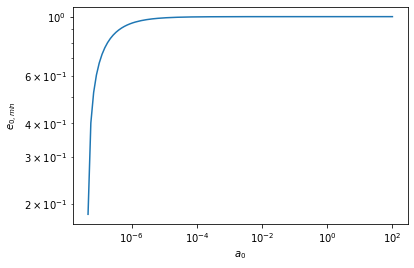

<ipython-input-42-cca3ed4bf327>:7: RuntimeWarning: invalid value encountered in sqrt
  e0 = np.sqrt(1 - 5.5e-6*(np.power(a0,-5./7))*(np.power(M_tot, 5./7)))


(250, 250) (250, 250)
[100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 1e-09] [4.8612391624802265e-17, 4.8612391624802265e-17, 5.794983568003621e-17, 6.908081135489467e-17, 6.908081135489467e-17, 8.234981931268044e-17, 8.234981931268044e-17, 9.816753173311735e-17, 9.816753173311735e-17, 1.1702350250437883e-16]


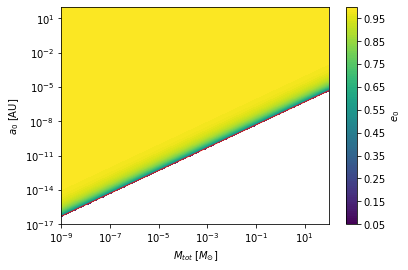

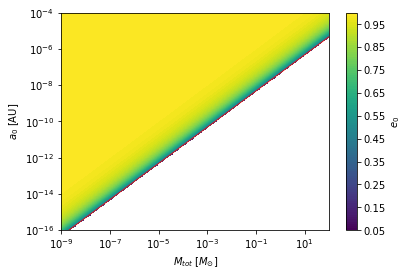

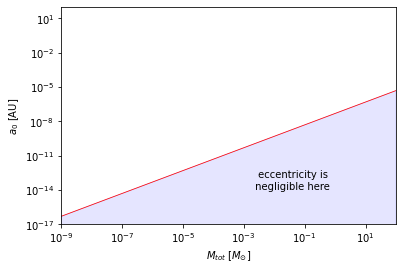

In [42]:
def e_0_min(M_tot = 1, a0=1):
    """
    M_tot assumed on solar masses
    a0 assumed in astronomic units
    """
    #print(M_tot,a0)
    e0 = np.sqrt(1 - 5.5e-6*(np.power(a0,-5./7))*(np.power(M_tot, 5./7)))
    return e0
M_tots = np.logspace(-7,2,91)
#print(e_0_min(M_tots))
plt.loglog(M_tots, e_0_min(M_tots))
#plt.xscale("log")
plt.xlabel(r"$M_{tot} \; [M_{\odot}]$")
plt.ylabel(r"$e_{0, min}$")
plt.show()

a0s = np.logspace(-10,2, 141)
#print(e_0_min(a0=a0s))

plt.loglog(a0s, e_0_min(a0=a0s))
#plt.xscale("log")
plt.xlabel(r"$a_0$")
plt.ylabel(r"$e_{0, min}$")
plt.show()

a0s = np.logspace(-17,2,250)
M_tots = np.logspace(-9,2,250)
MM, aa = np.meshgrid(M_tots, a0s)
#print(np.meshgrid([1,2,3],[1,2,3]))
print(np.shape(MM),np.shape(e_0_min(MM ,aa)))
e0s = e_0_min(MM ,aa)
M_mins = [np.min(M[~np.isnan(e0)]) if len(M[~np.isnan(e0)])>0 else np.max(M_tots) for M, e0 in zip(MM, e0s)]
a0_mins = [np.min(a[~np.isnan(e0)]) if len(a[~np.isnan(e0)])>0 else np.max(a0s) for a, e0 in zip(np.transpose(aa), np.transpose(e0s))]
print(M_mins[0:10],a0_mins[0:10])
plt.contourf(M_tots, a0s, e0s, levels = 100)
plt.xscale("log")
plt.yscale("log")
plt.xlabel(r"$M_{tot} \; [M_{\odot}]$")
plt.ylabel(r"$a_0$ [AU]")
plt.colorbar(label = r"$e_0$")
#plt.plot([M_tots[0], M_tots[-1]], [a0s[0], a0s[-1]])
plt.plot([M_tots[0], M_tots[-1]], [a0_mins[0], a0_mins[-1]], color= "red", linewidth=0.75)#->good!
#plt.plot([M_mins[0], M_mins[-1]], [a0s[0], a0s[-1]])
#plt.plot([M_mins[0], M_mins[-1]], [a0_mins[0], a0_mins[-1]])
plt.show()

plt.contourf(M_tots, a0s, e0s, levels = 100)
plt.xscale("log")
plt.yscale("log")
plt.xlabel(r"$M_{tot} \; [M_{\odot}]$")
plt.ylabel(r"$a_0$ [AU]")
#plt.xlim(1e-3, 1e2)
plt.ylim(1e-16, 1e-4)
plt.colorbar(label = r"$e_0$")
#plt.plot([M_tots[0], M_tots[-1]], [a0_mins[0], a0_mins[-1]])
plt.plot([M_tots[0], M_tots[-1]], [a0_mins[0], a0_mins[-1]], color= "red", linewidth=0.75)

plt.show()

fig, ax = plt.subplots()
plt.plot([M_tots[0], M_tots[-1]], [a0_mins[0], a0_mins[-1]], color= "red", linewidth=0.75)
plt.xscale("log")
plt.yscale("log")
plt.xlabel(r"$M_{tot} \; [M_{\odot}]$")
plt.ylabel(r"$a_0$ [AU]")
plt.xlim(1e-9, 1e2)
plt.ylim(1e-17, 1e2)
ax.fill_between([M_tots[0], M_tots[-1]], [a0_mins[0], a0_mins[-1]], color='blue', alpha=.1)
plt.text(0.65, 0.2, \
         """
         eccentricity is
         negligible here
         """,\
         horizontalalignment='center',verticalalignment='center', transform=ax.transAxes)
plt.show()

In [3]:
np.min([[1,2],[0,4]], axis = 1)

array([1, 0])

In [20]:
print(e0s[0])
print(np.transpose(e0s)[0])

[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan]
[       nan        nan        nan        nan        nan        nan
        nan 0.22585474 0.43465005 0.55388572 0.63838001 0.70258727
 0.7531377  0.79379464 0.82696044 0.85428658 0.876967